In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

df = pd.read_csv('./homeprices_banglore.csv')

In [372]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
y = df['price']
X = df.drop(columns='price')
X = sx.fit_transform(X)
y = sy.fit_transform(y.values.reshape(-1,1))

In [373]:
def batch_grad_desc(X, y, lr=0.01, epochs=500):
    m, n = X.shape
    w = np.random.rand(n,1)
    b = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(X, w) + b

        w_grad = -2/m * np.dot(X.T, (y - y_pred))
        b_grad = -2/m * np.sum(y - y_pred)

        w -= lr * w_grad
        b -= lr * b_grad

        cost = np.mean(np.square(y - y_pred))
        if i%5==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [374]:
def predict_batch(area, bedrooms):
    w_res, b_res, cost_res, cost_list, epoch_list = batch_grad_desc(X, y, lr=0.01, epochs=500)
    x = np.array([area, bedrooms]).reshape(1,2)
    x = sx.transform(x)
    y_scaled = np.dot(x, w_res) + b_res
    return sy.inverse_transform(y_scaled)

In [375]:
import numpy as np

def stochastic_grad_desc(X, y, lr=0.01, epochs=500):
    y = y.reshape(1,-1)[0]
    m, n = X.shape
    w = np.random.rand(n,1)
    b = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_ind = np.random.randint(0,m-1)
        sampleX = X[random_ind]
        sampley = y[random_ind]

        y_pred = np.dot(w.T, sampleX) + b
        w_grad = -2/m * (sampleX.reshape(-1, 1).dot(sampley-y_pred))
        b_grad = -2/m * np.sum(sampley - y_pred)

        w_grad = w_grad.reshape(w.shape)  # Reshape w_grad to match the shape of w
        w -= lr * w_grad
        b -= lr * b_grad

        cost = np.mean(np.square(sampley - y_pred))
        if i % 5 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


In [376]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    m, n = X.shape
    w = np.random.rand(n, 1)
    b = 0

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, m - 1)  # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w.T, sample_x) + b

        w_grad = -(2 / m) * (sample_x.reshape(-1, 1) * (sample_y - y_predicted))
        b_grad = -(2 / m) * (sample_y - y_predicted)

        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 5 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [377]:
w_res, b_res, cost_res, cost_list, epoch_list = batch_grad_desc(X, y, lr=0.01, epochs=500)
print(f"BATCH GRAD DESCENT : final w is {w_res}, final b is {b_res}, and final cost is {cost_res}")

BATCH GRAD DESCENT : final w is [[0.41952094]
 [0.6896404 ]], final b is -0.12327455092871419, and final cost is 0.007576840829032386


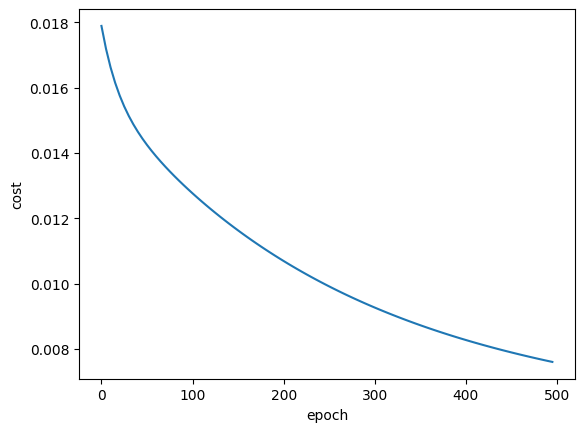

In [378]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [379]:
w_res, b_res, cost_res, cost_list, epoch_list = stochastic_grad_desc(X, y, lr=0.01, epochs=500)
print(f"STOCHASTIC GRAD DESCENT : final w is {w_res}, final b is {b_res}, and final cost is {cost_res}")

STOCHASTIC GRAD DESCENT : final w is [[0.78427582]
 [0.83186845]], final b is -0.14630460004992543, and final cost is 0.02887682144670651


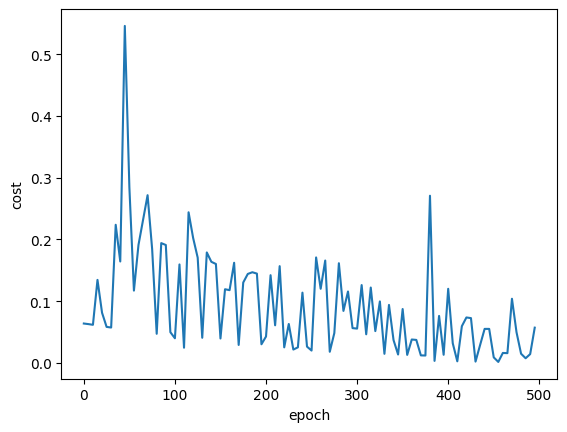

In [380]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [381]:
def predict_stocastic(area, bedrooms):
    w_res, b_res, cost_res, cost_list, epoch_list = stochastic_grad_desc(X, y, lr=0.01, epochs=500)
    x = np.array([area, bedrooms]).reshape(1,2)
    x = sx.transform(x)
    y_scaled = np.dot(x, w_res) + b_res
    return sy.inverse_transform(y_scaled)

In [382]:
def mini_batch_grad_desc(X, y, lr=0.01, epochs=500):
    m, n = X.shape
    batchsize = int(0.3*m)
    batch = [random.randint(0, m-1) for i in range(batchsize)]
    X = X[batch]
    y = y[batch]
    w = np.random.rand(n,1)
    b = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(X, w) + b

        w_grad = -2/m * np.dot(X.T, (y - y_pred))
        b_grad = -2/m * np.sum(y - y_pred)

        w -= lr * w_grad
        b -= lr * b_grad

        cost = np.mean(np.square(y - y_pred))
        if i%5==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [383]:
w_res, b_res, cost_res, cost_list, epoch_list = mini_batch_grad_desc(X, y, lr=0.01, epochs=500)
print(f"MINIBATCH GRAD DESCENT : final w is {w_res}, final b is {b_res}, and final cost is {cost_res}")

MINIBATCH GRAD DESCENT : final w is [[0.46072633]
 [0.63271302]], final b is -0.02058648918045258, and final cost is 0.01172202763027519


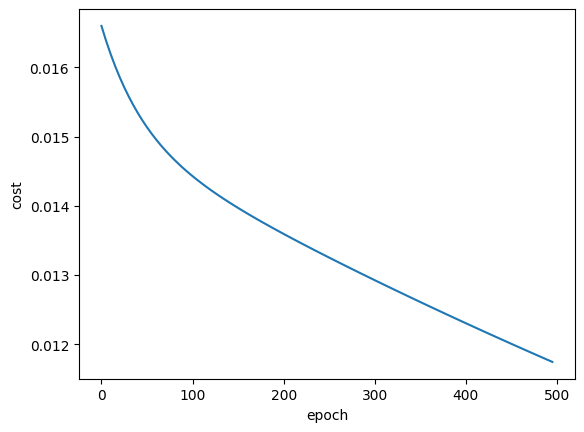

In [384]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [385]:
def predict_mini(area, bedrooms):
    w_res, b_res, cost_res, cost_list, epoch_list = mini_batch_grad_desc(X, y, lr=0.01, epochs=500)
    x = np.array([area, bedrooms]).reshape(1,2)
    x = sx.transform(x)
    y_scaled = np.dot(x, w_res) + b_res
    return sy.inverse_transform(y_scaled)

In [386]:
batch_ans = predict_batch(2600, 4)
stoc_ans = predict_stocastic(2600, 4)
mini_ans = predict_mini(2600, 4)

print(f"batch prediction is {batch_ans}, stocastic prediction is {stoc_ans} and mini-batch prediction is {mini_ans} for 2600 sqft area and 4 bedrooms.")

batch prediction is [[116.00810315]], stocastic prediction is [[109.28992659]] and mini-batch prediction is [[130.52233408]] for 2600 sqft area and 4 bedrooms.


c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
